# **Data**

For our exercises we will use two different datasets:
- The AG News subset that features english news articles of 4 different categories
- The 10kGNAD dataset that features german news articles of 9 different categories

In [1]:
import csv
import pandas as pd

# english data
classes_en = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/train.csv", 
                       names = ["Label", "Title", "Article"],
                       encoding = "utf-8")
test_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/test.csv", 
                      names = ["Label", "Title", "Article"],
                      encoding = "utf-8")

# german data
train_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/train.csv", 
                       sep = ";", names = ["Label", "Article"], 
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")
test_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/test.csv", 
                       sep = ";", names = ["Label", "Article"], 
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")

### The english dataset features 120 000 training and 7600 test samples with equally balanced classes

In [2]:
print(train_en.shape)
print(test_en.shape)
train_en.head()

(120000, 3)
(7600, 3)


,Label,Title,Article
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


<AxesSubplot: >

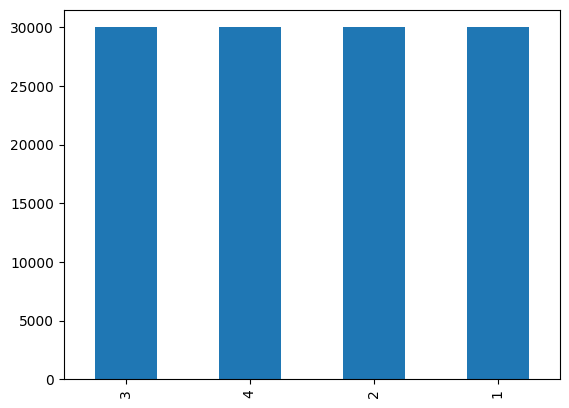

In [3]:
train_en["Label"].value_counts().plot(kind = "bar")

### The german dataset features 9245 training and 1028 test samples with rather unbalanced classes

In [4]:
print(train_de.shape)
print(test_de.shape)
train_de.head()

(9245, 2)
(1028, 2)


,Label,Article
0,Sport,21-Jähriger fällt wohl bis Saisonende aus. Wie...
1,Kultur,"Erfundene Bilder zu Filmen, die als verloren g..."
2,Web,Der frischgekürte CEO Sundar Pichai setzt auf ...
3,Wirtschaft,"Putin: ""Einigung, dass wir Menge auf Niveau vo..."
4,Inland,Estland sieht den künftigen österreichischen P...


<AxesSubplot: >

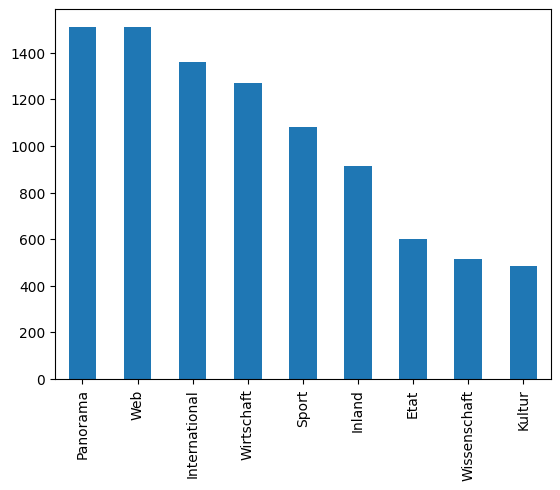

In [5]:
train_de["Label"].value_counts().plot(kind = "bar")

# **spaCy**

spaCy is a natural language processing library that comes with many built-in features that solve core linguistic tasks.  
The following exercises should be carried out by getting familiar with the spaCy API. The documentation can be found at:

[https://spacy.io/usage](https://spacy.io/usage)

spaCy needs a language model to analyze text, we will work with both the english and the german language models which can be downloaded by executing the following:

In [6]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 10.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
!python -m spacy download de_core_news_sm

     --------------------------------------- 14.6/14.6 MB 10.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


### Loading models

In [8]:
import spacy
import random
import en_core_web_sm
import de_core_news_sm

nlp_en = en_core_web_sm.load()
nlp_de = de_core_news_sm.load()

### Use spaCy to tokenize a random Article of both the english and the german dataset

In [25]:
# select a random english article
r_en = random.randint(0, train_en.shape[0] - 1)
# your code here
# ...

In [26]:
# select a random german article
r_de = random.randint(0, train_de.shape[0] - 1)
# your code here
# ...

### Use spaCy to lemmatize a random Article of both the english and the german dataset

In [27]:
# your code here [en]

In [28]:
# your code here [de]

### Use spaCy for Part-Of-Speech tagging of a random Article of both the english and the german dataset

- Either print the token attributes or visualize them as a table!
- What do the attributes describe?
- Visualize the POS attribute as a dependency plot with spaCy's displacy!
- Optional: For the german dataset visualize sentences separately for better readability.

In [29]:
# your code here [en]

In [30]:
from spacy import displacy

# your code here [en]

In [31]:
# your code here [de]

In [32]:
# your code here [de]

### Use spaCy for Named Entity Recognition (NER) of a random Article of both the english and the german dataset

- Either print the entity attributes or visualize them as a table!
- Visualize the entities as an entity plot with spaCy's displacy!

In [33]:
# your code here [en]

In [34]:
# your code here [en]

In [35]:
# your code here [de]

In [36]:
# your code here [de]

### We can also use spaCy to calculate the similarity between a german and an english article

- Read also: [https://spacy.io/usage/spacy-101#vectors-similarity](https://spacy.io/usage/spacy-101#vectors-similarity)

In [21]:
tokens_de.similarity(tokens_en)

C:\Users\Micha\AppData\Local\Temp\ipykernel_2460\2367601588.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  tokens_de.similarity(tokens_en)


0.241850976064987

In [22]:
fruits = nlp_en("apple banana")
fruits[0].similarity(fruits[1])

C:\Users\Micha\AppData\Local\Temp\ipykernel_2460\4107816708.py:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  fruits[0].similarity(fruits[1])


0.2706584334373474

### spaCy also encodes documents and tokens as feature vectors (we might come back to this later on)

In [23]:
token = tokens_en[0]
print(token.vector.shape)
print(tokens_en.vector.shape)

(96,)
(96,)
